# Week 2 Lab: Datasets, Missing Data, Outliers & Categorical Variables

- **Missing data patterns** (MCAR, MAR, MNAR, monotone)
- **Outliers** (extreme values, data-entry errors)
- **Categorical cleaning & encoding** (nominal/ordinal, unseen levels)

We'll proceed step by step.

In [1]:
# 📦 Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

## 1) Load the dataset

In [2]:
# Load the dataset

df = pd.read_csv('C:/Users/parha/OneDrive/Desktop/lab1/dataset1.csv')
print(df.head())
print('\nShape:', df.shape)
df.info()

    Age  AnnualIncome  SystolicBP  Cholesterol  VisitsLastYear   BMI  \
0  42.4       21414.0       137.0        183.3             4.0  24.7   
1  45.5       17547.0       124.9        196.0             4.0  18.2   
2  36.6       18578.0       109.8        157.1             5.0  18.9   
3  41.1       36122.0       111.9        232.0             2.0  20.8   
4  56.2       39296.0       108.6        133.5             6.0  28.4   

  EducationLevel  Gender        City  Diagnosis  FamilyHistoryScore  
0         Medium  Female  St. John's          0            0.764372  
1           High  Female     Toronto          0           -1.058040  
2            Low    Male     Toronto          0                 NaN  
3         Medium    Male    Montreal          0            1.278950  
4            Low  Female     Toronto          0                 NaN  

Shape: (608, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 11 columns):
 #   Column             

## 2) Quick EDA

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 570 non-null    float64
 1   AnnualIncome        526 non-null    float64
 2   SystolicBP          579 non-null    float64
 3   Cholesterol         546 non-null    float64
 4   VisitsLastYear      608 non-null    float64
 5   BMI                 608 non-null    float64
 6   EducationLevel      608 non-null    object 
 7   Gender              608 non-null    object 
 8   City                608 non-null    object 
 9   Diagnosis           608 non-null    int64  
 10  FamilyHistoryScore  336 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 52.4+ KB


In [4]:

#print('\nMissing counts per column:')
#print(df.isna().sum().sort_values())

print('\nDuplicate rows:', df.duplicated())


Duplicate rows: 0      False
1      False
2      False
3      False
4      False
       ...  
603    False
604    False
605    False
606    False
607    False
Length: 608, dtype: bool


<Axes: >

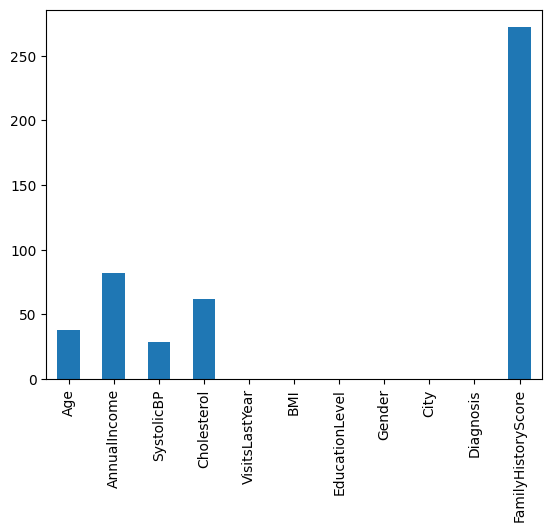

In [5]:
'''plt.imshow(df.isna() , aspect ='auto' ,cmap = 'gray')
plt.show()'''

df.isna().sum().plot(kind = 'bar')

## 3) Visualize Missingness

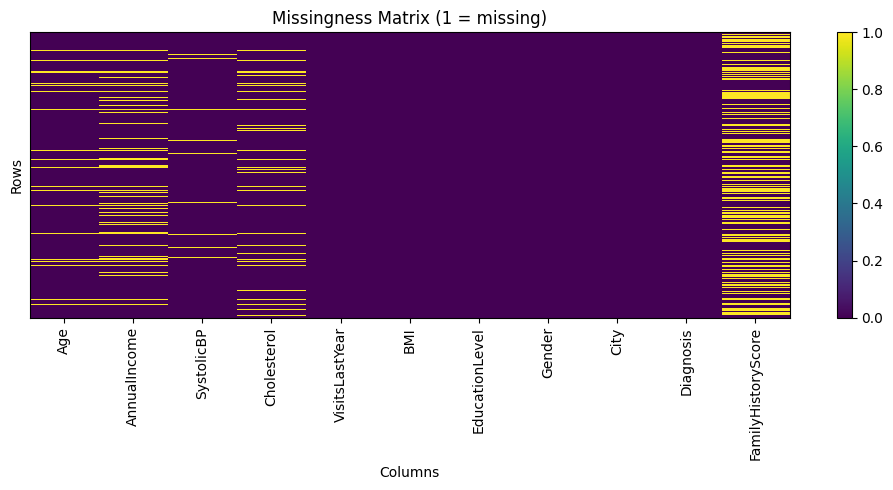

In [6]:
# Simple missingness matrix using matplotlib (no seaborn)
import numpy as np
mask = df.isna().astype(int).values

plt.figure(figsize=(10,5))
plt.imshow(mask, aspect='auto', interpolation='nearest')
plt.title('Missingness Matrix (1 = missing)')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.xticks(ticks=range(df.shape[1]), labels=df.columns, rotation=90)
plt.yticks([])
plt.colorbar()
plt.tight_layout()
plt.show()

## 4) Correlation Heatmap (Numeric Columns)

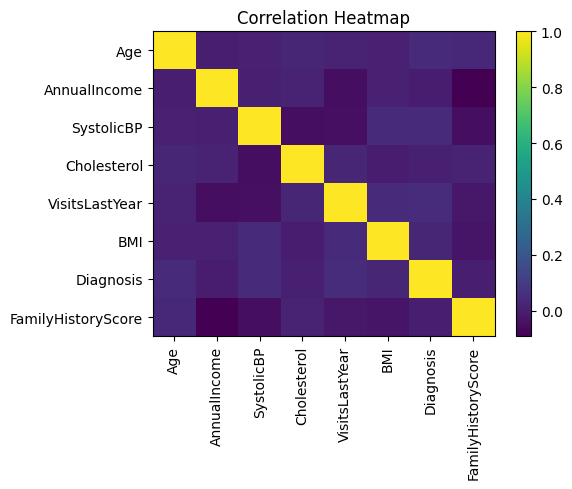

,Age,AnnualIncome,SystolicBP,Cholesterol,VisitsLastYear,BMI,Diagnosis,FamilyHistoryScore
Age,1.000000,-0.001839,0.006906,0.027207,0.013051,0.008679,0.036394,0.027804
AnnualIncome,-0.001839,1.000000,0.002764,0.018961,-0.049615,0.009639,-0.009546,-0.091738
SystolicBP,0.006906,0.002764,1.000000,-0.049239,-0.046901,0.040245,0.040188,-0.050921
Cholesterol,0.027207,0.018961,-0.049239,1.000000,0.024595,-0.008024,0.003918,0.014040
VisitsLastYear,0.013051,-0.049615,-0.046901,0.024595,1.000000,0.043459,0.046329,-0.021789
BMI,0.008679,0.009639,0.040245,-0.008024,0.043459,1.000000,0.024941,-0.029431
Diagnosis,0.036394,-0.009546,0.040188,0.003918,0.046329,0.024941,1.000000,0.001981
FamilyHistoryScore,0.027804,-0.091738,-0.050921,0.014040,-0.021789,-0.029431,0.001981,1.000000


In [7]:
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr(numeric_only=True)
plt.figure(figsize=(6,5))
plt.imshow(corr, interpolation='nearest', aspect='auto')
plt.title('Correlation Heatmap')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.tight_layout()
plt.show()
corr

## 5) Outlier Visuals: Histograms & Boxplots

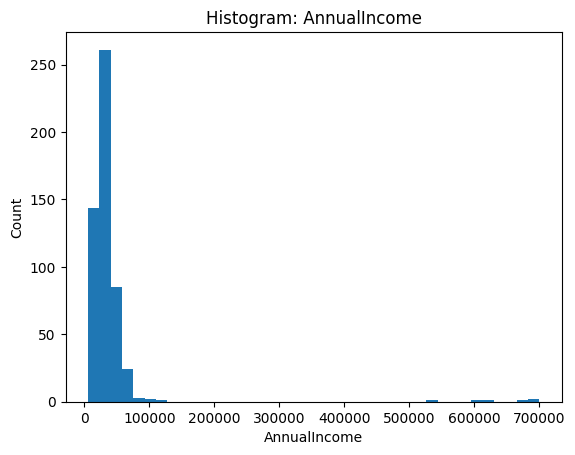

C:\Users\parha\AppData\Local\Temp\ipykernel_15264\1646637227.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[c].dropna(), vert=True, labels=[c])


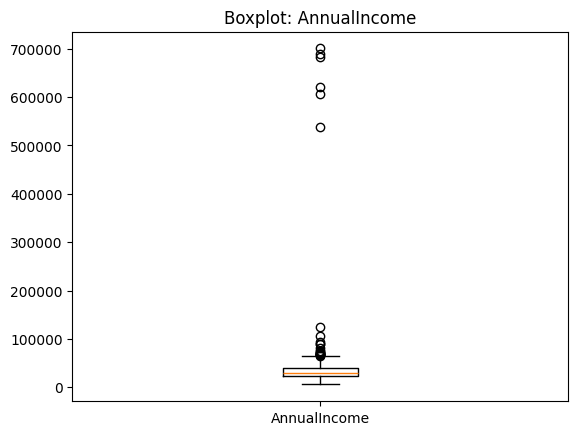

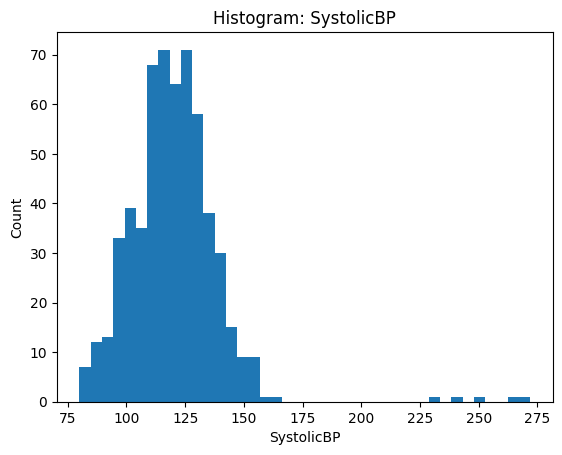

C:\Users\parha\AppData\Local\Temp\ipykernel_15264\1646637227.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[c].dropna(), vert=True, labels=[c])


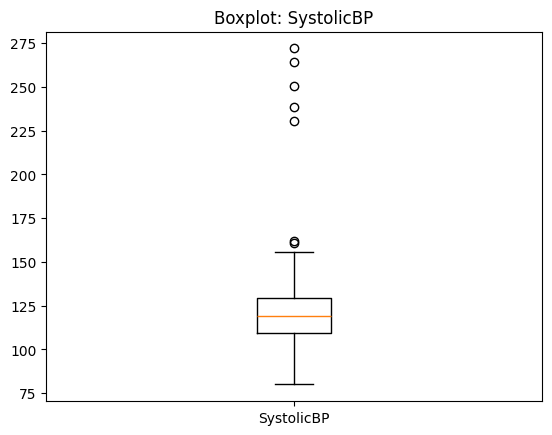

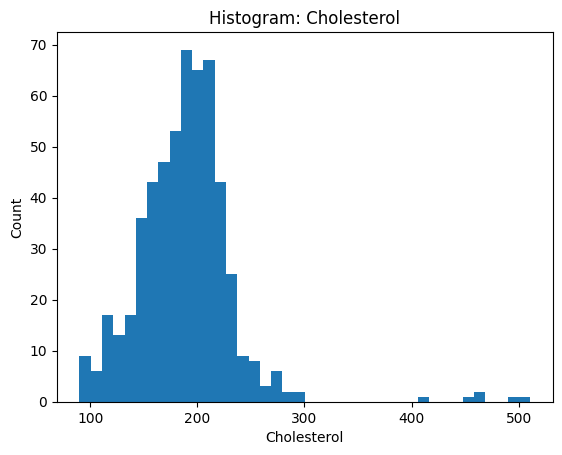

C:\Users\parha\AppData\Local\Temp\ipykernel_15264\1646637227.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[c].dropna(), vert=True, labels=[c])


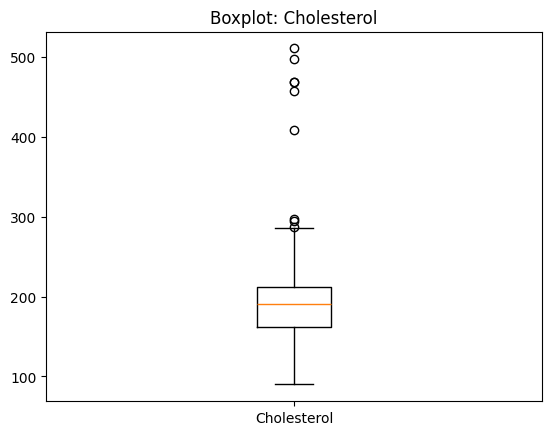

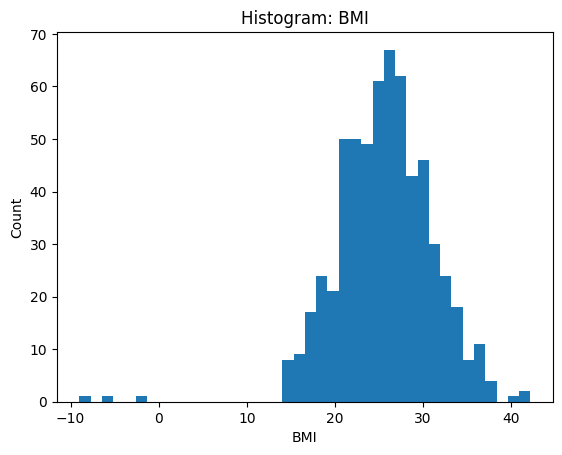

C:\Users\parha\AppData\Local\Temp\ipykernel_15264\1646637227.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[c].dropna(), vert=True, labels=[c])


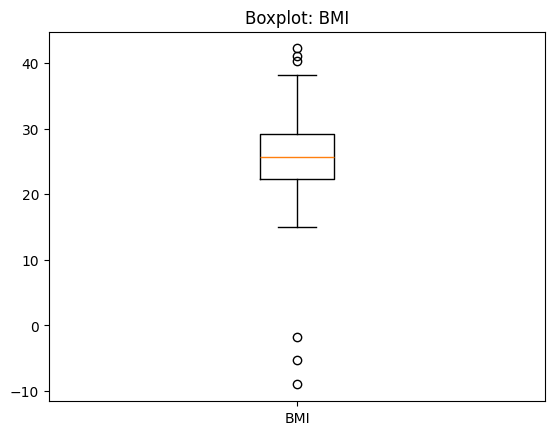

In [8]:
cols = ['AnnualIncome','SystolicBP','Cholesterol','BMI']
for c in cols:
    plt.figure()
    plt.hist(df[c].dropna(), bins=40)
    plt.title(f'Histogram: {c}')
    plt.xlabel(c); plt.ylabel('Count')
    plt.show()

    plt.figure()
    plt.boxplot(df[c].dropna(), vert=True, labels=[c])
    plt.title(f'Boxplot: {c}')
    plt.show()

## 6) Remove Exact Duplicates (Optional)

In [9]:
# Drop exact duplicates if desired
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f'Removed {before - after} exact duplicate rows. New shape: {df.shape}')

Removed 8 exact duplicate rows. New shape: (600, 11)


## 7) Missing Data — Simple Imputation

In [10]:
# Median for numeric; mode for categorical
df_simple = df.copy()

num_cols = df_simple.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_simple.select_dtypes(exclude=[np.number]).columns.tolist()

for c in num_cols:
    df_simple[c] = df_simple[c].fillna(df_simple[c].median())

for c in cat_cols:
    df_simple[c] = df_simple[c].fillna(df_simple[c].mode().iloc[0])

print('Simple imputation complete.')
df_simple.isna().sum()

Simple imputation complete.


Age                   0
AnnualIncome          0
SystolicBP            0
Cholesterol           0
VisitsLastYear        0
BMI                   0
EducationLevel        0
Gender                0
City                  0
Diagnosis             0
FamilyHistoryScore    0
dtype: int64

## 8) Missing Data — KNN Imputation (Numeric Only)

In [11]:
# KNN imputation applied to numeric columns; categorical left as-is for now
df_knn = df.copy()
num_cols = df_knn.select_dtypes(include=[np.number]).columns.tolist()

imputer = KNNImputer(n_neighbors=5, weights='distance')
df_knn[num_cols] = imputer.fit_transform(df_knn[num_cols])

print('KNN imputation complete for numeric columns.')
df_knn[num_cols].isna().sum().sum()

KNN imputation complete for numeric columns.


np.int64(0)

## 9) Missing Data — Regression Imputation (AnnualIncome)

In [12]:
# Use complete cases to fit a regressor predicting AnnualIncome
df_reg = df.copy()
features = ['Age','SystolicBP','Cholesterol','VisitsLastYear','BMI']
train_mask = df_reg['AnnualIncome'].notna() & df_reg[features].notna().all(axis=1)
test_mask = df_reg['AnnualIncome'].isna() & df_reg[features].notna().all(axis=1)

X_train = df_reg.loc[train_mask, features]
y_train = df_reg.loc[train_mask, 'AnnualIncome']
X_pred  = df_reg.loc[test_mask, features]

model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_pred)
df_reg.loc[test_mask, 'AnnualIncome'] = preds

print('Filled AnnualIncome via regression for rows with complete predictors.')
df_reg['AnnualIncome'].isna().sum()

Filled AnnualIncome via regression for rows with complete predictors.


np.int64(37)

## 10) Outlier Handling — IQR Fences & Winsorization

AnnualIncome: 38 outliers (IQR fences 3313.75..57553.75)
SystolicBP: 11 outliers (IQR fences 81.06..157.16)
Cholesterol: 23 outliers (IQR fences 102.51..271.81)
BMI: 6 outliers (IQR fences 12.10..39.30)


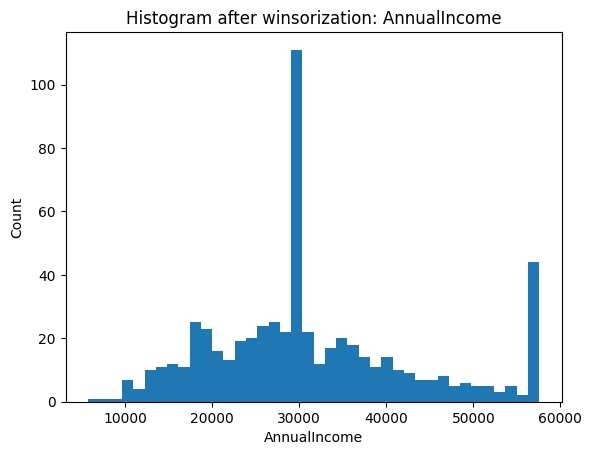

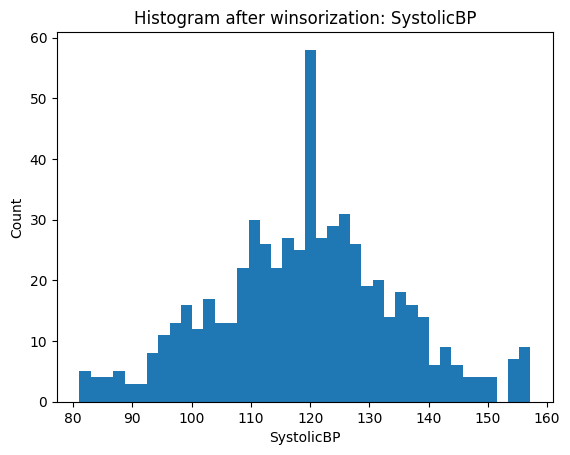

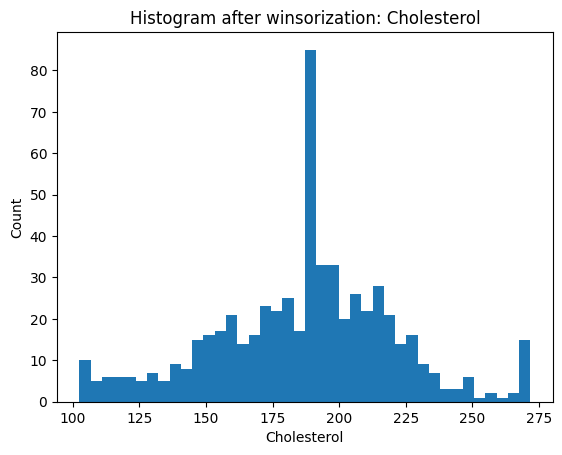

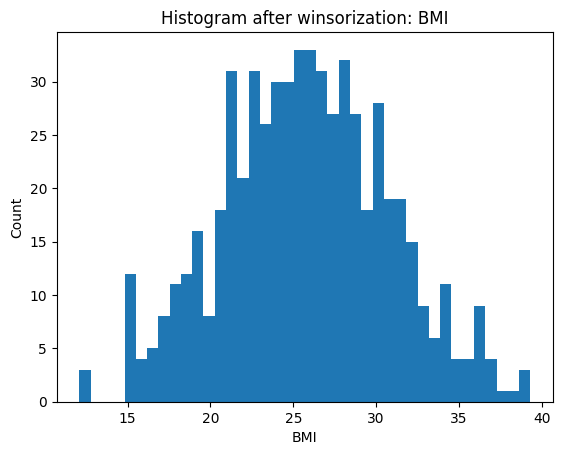

In [13]:
def iqr_mask(s, k=1.5):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - k*iqr, q3 + k*iqr
    return (s < lower) | (s > upper), (lower, upper)

df_out = df_simple.copy()  # start from simply imputed
for c in ['AnnualIncome','SystolicBP','Cholesterol','BMI']:
    mask, (lo, hi) = iqr_mask(df_out[c])
    print(f'{c}: {mask.sum()} outliers (IQR fences {lo:.2f}..{hi:.2f})')
    # Winsorize: clip to inner fences
    df_out[c] = df_out[c].clip(lo, hi)

# Check hist after winsorization
for c in ['AnnualIncome','SystolicBP','Cholesterol','BMI']:
    plt.figure()
    plt.hist(df_out[c], bins=40)
    plt.title(f'Histogram after winsorization: {c}')
    plt.xlabel(c); plt.ylabel('Count')
    plt.show()

## 11) Categorical Cleaning

In [14]:
df_cat = df_out.copy()

# Normalize text categories
for c in ['Gender','City','EducationLevel']:
    df_cat[c] = df_cat[c].astype(str).str.strip()

# Clean Gender variants
gender_map = {
    'female':'Female', 'FEMALE':'Female', 'fem':'Female',
    'MALE':'Male', 'm':'Male', 'other':'Other', 'Non-binary':'Other'
}
df_cat['Gender'] = df_cat['Gender'].replace(gender_map)

print('Category levels after cleaning:')
for c in ['Gender','City','EducationLevel']:
    print(c, sorted(df_cat[c].unique()))

Category levels after cleaning:
Gender ['Female', 'Male', 'Other']
City ['Halifax', 'Montreal', "St. John's", 'Toronto', 'Vancouver']
EducationLevel ['High', 'Low', 'Medium']


## 12) Encoding Categorical Variables

In [15]:
df_enc = df_cat.copy()

# Ordinal encoding for EducationLevel
ord_enc = OrdinalEncoder(categories=[['Low','Medium','High']])
df_enc['EducationLevel_Ord'] = ord_enc.fit_transform(df_enc[['EducationLevel']])

# One-hot/dummy for nominal categories
df_enc = pd.get_dummies(df_enc, columns=['Gender','City'], drop_first=True)

print('Encoded columns:')
print([c for c in df_enc.columns if c.startswith('Gender_') or c.startswith('City_') or c=='EducationLevel_Ord'])
df_enc.head()

Encoded columns:
['EducationLevel_Ord', 'Gender_Male', 'Gender_Other', 'City_Montreal', "City_St. John's", 'City_Toronto', 'City_Vancouver']


,Age,AnnualIncome,SystolicBP,Cholesterol,VisitsLastYear,BMI,EducationLevel,Diagnosis,FamilyHistoryScore,EducationLevel_Ord,Gender_Male,Gender_Other,City_Montreal,City_St. John's,City_Toronto,City_Vancouver
0,42.4,21414.0,137.0,183.3,4.0,24.7,Medium,0,0.764372,1.0,False,False,False,True,False,False
1,45.5,17547.0,124.9,196.0,4.0,18.2,High,0,-1.058040,2.0,False,False,False,False,True,False
2,36.6,18578.0,109.8,157.1,5.0,18.9,Low,0,-0.146473,0.0,True,False,False,False,True,False
3,41.1,36122.0,111.9,232.0,2.0,20.8,Medium,0,1.278950,1.0,True,False,True,False,False,False
4,56.2,39296.0,108.6,133.5,6.0,28.4,Low,0,-0.146473,0.0,False,False,False,False,True,False


## 13) Save Processed Dataset

In [16]:
df_enc.to_csv('synthetic_ml_week2_clean_encoded.csv', index=False)
print('Saved to ml_week2_clean_encoded.csv')

Saved to ml_week2_clean_encoded.csv
